<a href="https://colab.research.google.com/github/garretbassett/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Garret_Bassett_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [18]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV, replace column headers, show header

new_headers = ['op_age', 'op_year', 'num_nodes', 'survival']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = new_headers)
df.head()

,op_age,op_year,num_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [19]:
# Validate number of observations

print(df.shape)

(306, 4)


In [20]:
# Confirm no missing values

df.isna().sum()
# df.isnull().sum().sum()

op_age       0
op_year      0
num_nodes    0
survival     0
dtype: int64

In [0]:
# Add informative names to the features

# DONE PREVIOUSLY

In [22]:
# Re-encode survival variable

print(df['survival'].value_counts())

df['survival'] = np.where(df['survival'] == 2, 0, 1)
print(df['survival'].value_counts())

1    225
2     81
Name: survival, dtype: int64
1    225
0     81
Name: survival, dtype: int64


In [23]:
# Print the first five rows of the dataset to demonstrate the above

df.head()

,op_age,op_year,num_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

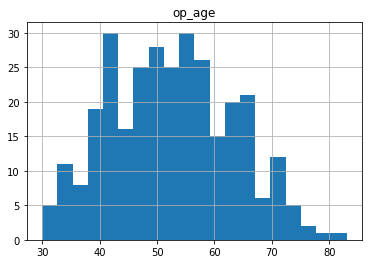

In [37]:
# First, I want to look at the distribution of patients by op_age

df.hist('op_age', bins = 20)
plt.show()

# This visual shows us a fairly standard distribution by age, with a longer tail
#   for older patients and a harder stop at 30 years old.

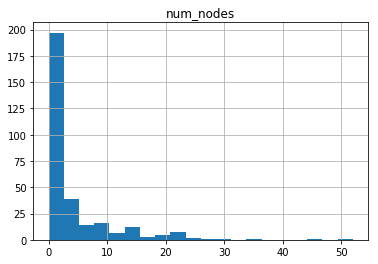

In [39]:
# Distribution by number of nodes

df.hist('num_nodes', bins = 20)
plt.show()

# The vast majority of patients had 0 nodes detected.

In [44]:
# I think nodes detected would be negatively correlated with survival rate.
# To test this hypothesis, I'll crosstab the two variables.

pd.crosstab(df['survival'], df['num_nodes'])

num_nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
survival,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1
1,117,33,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0


In [46]:
# Now I'll bin the nodes data to get better idea.

node_bins = pd.cut(df['num_nodes'], 10)
pd.crosstab(node_bins, df['survival'])

# Looks like there could be something here. I'll go deeper in a bit.

survival,0,1
num_nodes,,
"(-0.052, 5.2]",46,190
"(5.2, 10.4]",12,18
"(10.4, 15.6]",11,7
"(15.6, 20.8]",4,4
"(20.8, 26.0]",6,3
"(26.0, 31.2]",0,2
"(31.2, 36.4]",1,0
"(41.6, 46.8]",0,1
"(46.8, 52.0]",1,0


In [47]:
# Last thing I want to do here is to crosstab op_age and survival.

age_bins = pd.cut(df['op_age'], 10)

pd.crosstab(age_bins, df['survival'])

survival,0,1
op_age,,
"(29.947, 35.3]",2,14
"(35.3, 40.6]",2,25
"(40.6, 45.9]",15,31
"(45.9, 51.2]",16,37
"(51.2, 56.5]",18,37
"(56.5, 61.8]",9,32
"(61.8, 67.1]",12,29
"(67.1, 72.4]",4,14
"(72.4, 77.7]",1,6


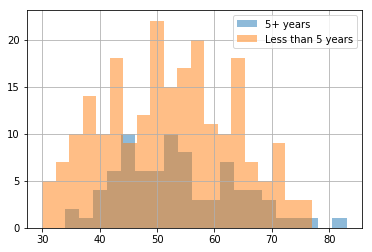

In [184]:
# There doesn't seem to be a clear relationship between age and survival. To
#   double-check, I want to plot a histogram of the two populations.

df.groupby('survival')['op_age'].hist(bins=20, alpha = 0.5)
plt.legend(['5+ years', 'Less than 5 years'])
plt.show()

In [85]:
# Let's try viewing the mix of survived / non-survived by each age bin
#   and compare against the overall mix.

print(df['survival'][df['survival'] == 1].count() / (df['survival'][df['survival'] == 1].count() + df['survival'][df['survival'] == 0].count()))
pd.crosstab(age_bins, df['survival'], normalize='index')

0.7352941176470589


survival,0,1
op_age,,
"(29.947, 35.3]",0.125000,0.875000
"(35.3, 40.6]",0.074074,0.925926
"(40.6, 45.9]",0.326087,0.673913
"(45.9, 51.2]",0.301887,0.698113
"(51.2, 56.5]",0.327273,0.672727
"(56.5, 61.8]",0.219512,0.780488
"(61.8, 67.1]",0.292683,0.707317
"(67.1, 72.4]",0.222222,0.777778
"(72.4, 77.7]",0.142857,0.857143


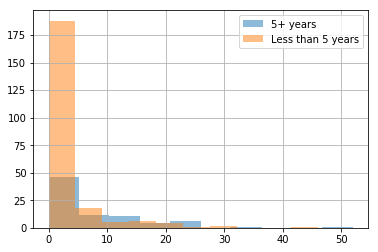

In [183]:
# Nothing jumping out here. What about nodes detected?

df.groupby('survival')['num_nodes'].hist(alpha=0.5)
plt.legend(['5+ years', 'Less than 5 years'])

In [87]:
# Once again, I'll compare the mix by node bin and compare against the aggregate.

print(df['survival'][df['survival'] == 1].count() / (df['survival'][df['survival'] == 1].count() + df['survival'][df['survival'] == 0].count()))
pd.crosstab(node_bins, df['survival'], normalize = 'index')

0.7352941176470589


survival,0,1
num_nodes,,
"(-0.052, 5.2]",0.194915,0.805085
"(5.2, 10.4]",0.400000,0.600000
"(10.4, 15.6]",0.611111,0.388889
"(15.6, 20.8]",0.500000,0.500000
"(20.8, 26.0]",0.666667,0.333333
"(26.0, 31.2]",0.000000,1.000000
"(31.2, 36.4]",1.000000,0.000000
"(41.6, 46.8]",0.000000,1.000000
"(46.8, 52.0]",1.000000,0.000000


In [89]:
# I need logarithmically selected bins or something like that - I need more 
#   granularity at the lower end.

node_bins_new = pd.cut(df['num_nodes'], [0, 1, 2, 3, 5, 10, 20, df['num_nodes'].max()])
pd.crosstab(node_bins_new, df['survival'], normalize='index')

survival,0,1
num_nodes,,
"(0, 1]",0.195122,0.804878
"(1, 2]",0.250000,0.750000
"(2, 3]",0.350000,0.650000
"(3, 5]",0.368421,0.631579
"(5, 10]",0.400000,0.600000
"(10, 20]",0.576923,0.423077
"(20, 52]",0.571429,0.428571


In [117]:
# This is looking like a clear relationship. As the number of nodes detected
#   increases, the likelihood of survival decreases.

# What about operating year?

pd.crosstab(df['op_year'], df['survival'], normalize='index')

survival,0,1
op_year,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


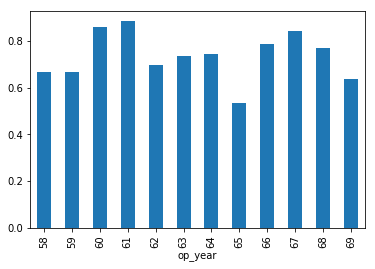

In [163]:
df.groupby('op_year')['survival'].mean().plot(kind='bar')
plt.show()

In [138]:
# There doesn't seem to be a strong relationship. What if I break out old vs.
#   non-old patients and create a new feature with the result?

df['is_old'] = df['op_age'] > 60
pd.crosstab(df['op_year'], [df['survival'], df['is_old']], normalize='index')

survival         0                   1          
is_old       False     True      False     True 
op_year                                         
58        0.166667  0.166667  0.500000  0.166667
59        0.296296  0.037037  0.481481  0.185185
60        0.107143  0.035714  0.821429  0.035714
61        0.038462  0.076923  0.692308  0.192308
62        0.217391  0.086957  0.521739  0.173913
63        0.200000  0.066667  0.600000  0.133333
64        0.225806  0.032258  0.612903  0.129032
65        0.321429  0.142857  0.357143  0.178571
66        0.178571  0.035714  0.500000  0.285714
67        0.120000  0.040000  0.600000  0.240000
68        0.153846  0.076923  0.230769  0.538462
69        0.363636  0.000000  0.636364  0.000000

In [0]:
# Not sure how to create a bar chart with only the old subset of patients.

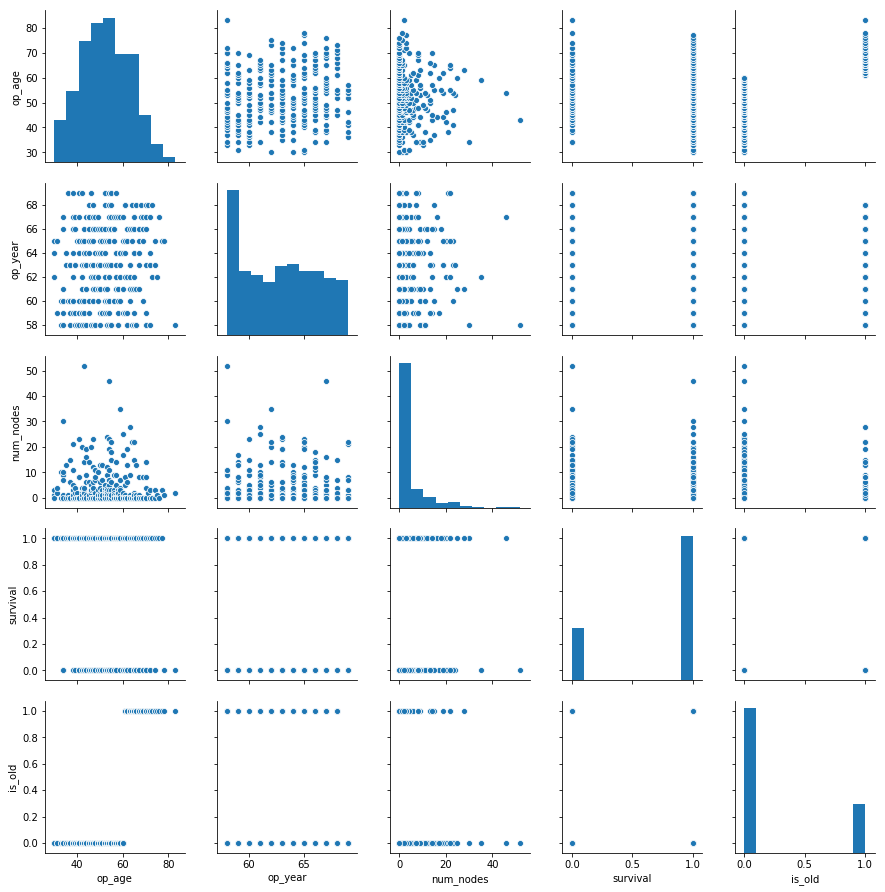

In [142]:
# This is a weaker relationship, but it looks like the survival rate of
#   patients over 60 has gone up in recent years.

# What about a pair plot?

df['is_old'] = np.where(df['is_old'] == True, 1, 0)

import seaborn as sns

sns.pairplot(df)

In [189]:
# What happened to the number of nodes detected for old patients over the same
#   time frame?

pd.crosstab(df['op_year'], [df['num_nodes'] > 2, df['is_old']], normalize='index')

num_nodes     False               True           
is_old            0         1         0         1
op_year                                          
58         0.388889  0.305556  0.277778  0.027778
59         0.481481  0.148148  0.296296  0.074074
60         0.607143  0.071429  0.321429  0.000000
61         0.500000  0.153846  0.230769  0.115385
62         0.434783  0.130435  0.304348  0.130435
63         0.433333  0.200000  0.366667  0.000000
64         0.580645  0.129032  0.258065  0.032258
65         0.392857  0.142857  0.285714  0.178571
66         0.428571  0.250000  0.250000  0.071429
67         0.480000  0.200000  0.240000  0.080000
68         0.153846  0.615385  0.230769  0.000000
69         0.363636  0.000000  0.636364  0.000000

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### POSITIVE RELATIONSHIP

The variable I found to have the most clear positive relationship with survival was *operating year*, but only among older patients.

*See fourth column below:*

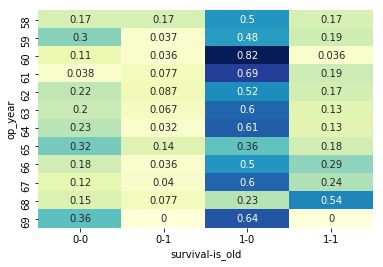

In [213]:
# pd.crosstab(df['op_year'], [df['survival'], df['is_old']], normalize='index')

sns.heatmap(pd.crosstab(df['op_year'], [df['survival'], df['is_old']], normalize='index'), cmap="YlGnBu", annot=True, cbar=False)
plt.show()

### NEGATIVE RELATIONSHIP

The variable I found to have the most clear negative relationship with survival was *number of nodes detected.*

*See second column below:*

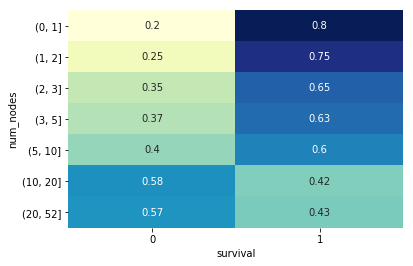

In [210]:
# pd.crosstab(node_bins_new, df['survival'], normalize='index')

sns.heatmap(pd.crosstab(node_bins_new, df['survival'], normalize='index'), cmap="YlGnBu", annot=True, cbar=False)
plt.show()

### RELATIONSHIP BETWEEN VARIABLES

It's not the strongest relationship, but it appears that the number of cases with multiple nodes detected for patients over 60 declines over time, potentially influencing the increasing survival rate of that same patient population.

*See second column below:*

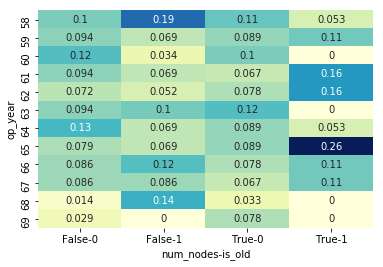

In [206]:
# pd.crosstab(df['op_year'], [df['num_nodes'] > 2, df['is_old']], normalize='index')

sns.heatmap(pd.crosstab(df['op_year'], [df['num_nodes'] > 2, df['is_old']], normalize='columns'), cmap="YlGnBu", annot=True, cbar=False)
plt.show()